In [ ]:
#install

pip install openpyxl
pip install seaborn
pip install sklearn
pip install matplotlib

In [ ]:
#import

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
#서울시 범죄율 데이터 가져오기

# CSV 파일 경로 (파일이 같은 폴더에 있을 경우)
file_path = 'crime2025.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# 데이터프레임 출력
print(df)

    자치구별(1)  자치구별(2)   2023 2023.1 2023.2 2023.3 2023.4 2023.5   2023.6  \
0   자치구별(1)  자치구별(2)     합계     합계     합계     합계     합계     합계       합계   
1   자치구별(1)  자치구별(2)     소계     소계     살인     살인     강도     강도  강간·강제추행   
2   자치구별(1)  자치구별(2)     발생     검거     발생     검거     발생     검거       발생   
3        합계       소계  86213  64823    150    144    129    117     5764   
4        합계      종로구   2981   3485      5      6      5      7      239   
5        합계       중구   3348   2465      3      3      6      5      212   
6        합계      용산구   3021   2268      3      4      3      3      245   
7        합계      성동구   2023   1411      2      1      2      2      119   
8        합계      광진구   3424   2333      2      2      5      3      238   
9        합계     동대문구   2957   2301      5      6      4      3      146   
10       합계      중랑구   3324   2474      6      6      2      2      169   
11       합계      성북구   2411   1958      1      1      1      1      141   
12       합계      강북구   24

In [ ]:
# CSV 파일 로드 (앞의 3줄은 메타 정보이므로 스킵)
df_cleaned = pd.read_csv('crime2025.csv', skiprows=3)

# 실제 컬럼명을 확인해 봅시다
print("컬럼 목록:\n")
for i, col in enumerate(df_cleaned.columns):
    print(f"{i}: '{col}'")


컬럼 목록:

0: '자치구별(1)'
1: '자치구별(2)'
2: '발생'
3: '검거'
4: '발생.1'
5: '검거.1'
6: '발생.2'
7: '검거.2'
8: '발생.3'
9: '검거.3'
10: '발생.4'
11: '검거.4'
12: '발생.5'
13: '검거.5'


In [ ]:
# CSV 불러오기
df_cleaned = pd.read_csv('crime2025.csv', skiprows=3)

# 실제 컬럼명 확인
print("실제 컬럼명 목록:")
for col in df_cleaned.columns:
    print(repr(col))


실제 컬럼명 목록:
'자치구별(1)'
'자치구별(2)'
'발생'
'검거'
'발생.1'
'검거.1'
'발생.2'
'검거.2'
'발생.3'
'검거.3'
'발생.4'
'검거.4'
'발생.5'
'검거.5'


In [ ]:
# 1. 파일 불러오기
df = pd.read_csv('crime2025.csv', skiprows=3)

# 2. 자치구 이름과 발생/검거 관련 열만 추출
cols = ['자치구별(2)', '발생', '검거', '발생.1', '검거.1', '발생.2', '검거.2',
        '발생.3', '검거.3', '발생.4', '검거.4', '발생.5', '검거.5']
df = df[cols].copy()

# 3. 컬럼 이름 정리
df = df.rename(columns={'자치구별(2)': '자치구'})

# 4. '합계'나 '소계' 같은 집계 행 제거
df = df[~df['자치구'].isin(['합계', '소계'])]

# 5. 모든 발생/검거 열을 수치형으로 변환
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 6. 전체 발생 합계, 검거 합계 계산
df['총발생'] = df[[col for col in df.columns if '발생' in col]].sum(axis=1)
df['총검거'] = df[[col for col in df.columns if '검거' in col]].sum(axis=1)

# 7. 차이 계산
df['차이'] = (df['총발생'] - df['총검거']).abs()

# 8. 차이 큰 상위 2개 자치구 추출
top2 = df.sort_values(by='차이', ascending=False).head(2)

print("차이 큰 상위 2개 자치구:")
print(top2[['자치구', '총발생', '총검거', '차이']])


차이 큰 상위 2개 자치구:
    자치구      총발생   총검거      차이
23  강남구  13526.0  9984  3542.0
24  송파구  10446.0  7040  3406.0


In [ ]:
# Excel 파일을 읽을 때, 처음 몇 줄을 건너뛰고(header를 설정)
# 'skiprows=5'를 사용하여 첫 5줄을 건너뛰고 데이터가 시작되는 줄을 header로 설정합니다.
df = pd.read_excel('songpa.xlsx', skiprows=2)

# 데이터 출력
print(df.head())  # 처음 5개 행 출력


   ○ 설치년도,광원,용량,형태,배전방식,등주타입 등이 다를때에는 다음 칸을 이용(같은 칸에서 Alt Enter 키 이용금지)  \
0   ○ 도로연장은 편측설치, 양측설치를 구분하고 실제 도로연장만 기재(가로등 설치연장...                      
1   ○ 교량하부등은 각종 하부통과도로 상에 있는 조명을 뜻하며 교량점검용 조명은 제외할 것                      
2                                             도로\n구분                      
3                                                NaN                      
4                                                NaN                      

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2     노선\n번호        노선명        구 간    노폭\n(m)    도로연장(m)        NaN   
3        NaN        NaN        NaN        NaN         편측         양측   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 35 Unnamed: 36 Unnamed: 37  \
0        NaN        NaN        NaN  ...    

In [25]:
# 필요한 열만 선택하기
df = df[['도로\n구분']]  # 원하는 열만 선택

# 데이터 출력
print(df.head())


  도로\n구분
0    NaN
1    NaN
2     시도
3    NaN
4    NaN


데이터 2차 정제

서울시 동대문구 vs 충남 당진 가로등 데이터터

In [ ]:
# 서울시 동대문구 가로등 데이터 출력

# CSV 파일 불러오기 (파일 경로가 정확해야 함, 같은 폴더일 경우 경로는 'dongdaemun.csv')
df = pd.read_csv('dongdaemun.csv', encoding='cp949')

# 데이터 확인
print("📌 원본 데이터:")
display(df.head())

# 공백이나 결측값 정리
df = df.fillna(0)  # 결측값을 0으로 대체

# '차도등', '보행등', '지하차도등', '지하보도등' 컬럼을 모두 정수형으로 변환
for col in ['차도등', '보행등', '지하차도등', '지하보도등']:
    df[col] = df[col].astype(int)

# 불필요한 공백 제거 (예: 컬럼명 등)
df.columns = df.columns.str.strip()

# 정제된 데이터 출력
print("✅ 정제된 데이터:")
display(df)

# 예: 특정 조건(차도등 수가 100 이상인 구간) 출력
print("🚦 차도등 수가 100개 이상인 구간:")
display(df[df['차도등'] >= 100])


📌 원본 데이터:


,도로구분,노선명,주소,구간,차도등,보행등,지하차도등,지하보도등,관리기관명,데이터기준일자
0,시도,청계천로,서울특별시 동대문구 청계천로,난계로~신답철교,70.0,50.0,NaN,NaN,서울특별시청,2024-01-01
1,시도,왕산로,서울특별시 동대문구 왕산로,신설동R~시조사,404.0,200.0,NaN,NaN,서울특별시청,2024-01-01
2,시도,천호대로,서울특별시 동대문구 천호대로,신설동R~군자교,267.0,216.0,NaN,NaN,서울특별시청,2024-01-01
3,시도,고산자로,서울특별시 동대문구 고산자로,고산자교~고려대역,161.0,105.0,NaN,NaN,서울특별시청,2024-01-01
4,시도,망우로,서울특별시 동대문구 망우로,시조사~중랑교,158.0,85.0,NaN,NaN,서울특별시청,2024-01-01


✅ 정제된 데이터:


,도로구분,노선명,주소,구간,차도등,보행등,지하차도등,지하보도등,관리기관명,데이터기준일자
0,시도,청계천로,서울특별시 동대문구 청계천로,난계로~신답철교,70,50,0,0,서울특별시청,2024-01-01
1,시도,왕산로,서울특별시 동대문구 왕산로,신설동R~시조사,404,200,0,0,서울특별시청,2024-01-01
2,시도,천호대로,서울특별시 동대문구 천호대로,신설동R~군자교,267,216,0,0,서울특별시청,2024-01-01
3,시도,고산자로,서울특별시 동대문구 고산자로,고산자교~고려대역,161,105,0,0,서울특별시청,2024-01-01
4,시도,망우로,서울특별시 동대문구 망우로,시조사~중랑교,158,85,0,0,서울특별시청,2024-01-01
5,시도,난계로,서울특별시 동대문구 난계로,황학교~대광중고앞,21,17,0,0,서울특별시청,2024-01-01
6,시도,제기로,서울특별시 동대문구 제기로,고대앞~떡전교사거리,142,101,0,0,서울특별시청,2024-01-01
7,시도,전농로,서울특별시 동대문구 전농로,떡전교사거리~답십리역,209,152,0,0,서울특별시청,2024-01-01
8,시도,서울시립대로,서울특별시 동대문구 서울시립대로,청계한신R~시립대앞R,138,95,0,0,서울특별시청,2024-01-01
9,시도,한천로,서울특별시 동대문구 한천로,도시철도공사R~코롱A앞,369,232,0,0,서울특별시청,2024-01-01


🚦 차도등 수가 100개 이상인 구간:


,도로구분,노선명,주소,구간,차도등,보행등,지하차도등,지하보도등,관리기관명,데이터기준일자
1,시도,왕산로,서울특별시 동대문구 왕산로,신설동R~시조사,404,200,0,0,서울특별시청,2024-01-01
2,시도,천호대로,서울특별시 동대문구 천호대로,신설동R~군자교,267,216,0,0,서울특별시청,2024-01-01
3,시도,고산자로,서울특별시 동대문구 고산자로,고산자교~고려대역,161,105,0,0,서울특별시청,2024-01-01
4,시도,망우로,서울특별시 동대문구 망우로,시조사~중랑교,158,85,0,0,서울특별시청,2024-01-01
6,시도,제기로,서울특별시 동대문구 제기로,고대앞~떡전교사거리,142,101,0,0,서울특별시청,2024-01-01
7,시도,전농로,서울특별시 동대문구 전농로,떡전교사거리~답십리역,209,152,0,0,서울특별시청,2024-01-01
8,시도,서울시립대로,서울특별시 동대문구 서울시립대로,청계한신R~시립대앞R,138,95,0,0,서울특별시청,2024-01-01
9,시도,한천로,서울특별시 동대문구 한천로,도시철도공사R~코롱A앞,369,232,0,0,서울특별시청,2024-01-01
10,시도,사가정로,서울특별시 동대문구 사가정로,신답역R~장안교,234,178,0,0,서울특별시청,2024-01-01
11,시도,이문로,서울특별시 동대문구 이문로,시조사~이문로54길,163,97,0,0,서울특별시청,2024-01-01


In [ ]:
# 파일 인코딩이 CP949 또는 EUC-KR일 수 있음
df = pd.read_csv('dangjin.csv')

# 컬럼 이름 공백 제거
df.columns = df.columns.str.strip()

# 모든 셀 내부 공백 제거
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# 숫자형 컬럼을 정수형으로 변환
for col in ['가로등(공원등미포)', '2023년 전력량', '2024년(6개월) 전력량']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# 정제된 데이터 확인
print("✅ 정제된 데이터:")
display(df)

# 예: 2023년 대비 2024년 6개월 전력 사용 비율 추가
df['사용률(2024/2023)'] = (df['2024년(6개월) 전력량'] / df['2023년 전력량'] * 100).round(1)

# 비율까지 포함된 테이블 출력
print("📊 2024년 전력량이 2023년의 몇 %인지 포함한 결과:")
display(df)


✅ 정제된 데이터:


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9208\2489352750.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,읍면동,가로등(공원등미포),2023년 전력량,2024년(6개월) 전력량
0,송산면,438,944220,468167
1,고대면,54,21137,11040
2,석문면,705,395817,245641
3,송악읍,1021,624045,587478
4,당진3동,494,256921,134803
5,대호지면,0,0,0
6,정미면,8,15484,8431
7,당진1동,1114,726181,379936
8,당진2동,893,548589,264073
9,순성면,129,44332,22321


📊 2024년 전력량이 2023년의 몇 %인지 포함한 결과:


,읍면동,가로등(공원등미포),2023년 전력량,2024년(6개월) 전력량,사용률(2024/2023)
0,송산면,438,944220,468167,49.6
1,고대면,54,21137,11040,52.2
2,석문면,705,395817,245641,62.1
3,송악읍,1021,624045,587478,94.1
4,당진3동,494,256921,134803,52.5
5,대호지면,0,0,0,NaN
6,정미면,8,15484,8431,54.4
7,당진1동,1114,726181,379936,52.3
8,당진2동,893,548589,264073,48.1
9,순성면,129,44332,22321,50.3


서울동대문구 vs 충남당진시 범죄율 데이터 출력력

In [5]:
# CSV 파일 읽기 (encoding='cp949' 또는 'utf-8-sig' 사용 시 한글 깨짐 방지)
df = pd.read_csv('region.csv', encoding='cp949')  # 또는 'utf-8-sig'로 시도

# 관심 있는 지역만 선택
columns_to_keep = ['범죄대분류', '범죄중분류', '서울동대문구', '충남당진시']

# 선택한 열만 출력
df_filtered = df[columns_to_keep]

# 출력
print(df_filtered)


     범죄대분류        범죄중분류  서울동대문구  충남당진시
0     강력범죄         살인기수       2      2
1     강력범죄        살인미수등       3      2
2     강력범죄           강도       4      1
3     강력범죄           강간      36     18
4     강력범죄         유사강간       5      1
5     강력범죄         강제추행     107     57
6     강력범죄  기타 강간 강제추행등       1      0
7     강력범죄           방화      11      4
8     절도범죄         절도범죄    1278    445
9     폭력범죄           상해     101     79
10    폭력범죄           폭행     839    338
11    폭력범죄         체포감금      11      1
12    폭력범죄           협박     170     82
13    폭력범죄        약취 유인       4      0
14    폭력범죄        폭력행위등      29     29
15    폭력범죄           공갈      53     27
16    폭력범죄           손괴     317    182
17    지능범죄         직무유기      13      4
18    지능범죄         직권남용      13      5
19    지능범죄          증수뢰       3      0
20    지능범죄           통화       8      1
21    지능범죄        문서 인장      70     34
22    지능범죄       유가증권인지       3      0
23    지능범죄           사기    2074   1066
24    지능범죄           횡령  

📌 상관계수:
       가로등개수  범죄건수
가로등개수    1.0  -1.0
범죄건수    -1.0   1.0


c:\Users\이지예\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\이지예\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\이지예\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\이지예\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\이지예\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: 

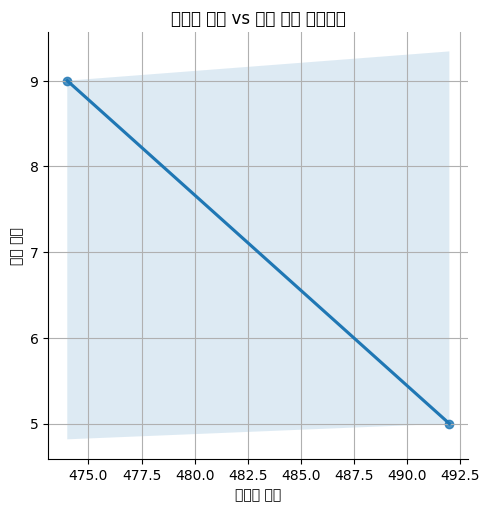

In [ ]:
# 실제 데이터로 치환
data = {
    '지역': ['서울동대문구', '충남당진시'],
    '가로등개수': [70 + 404, 438 + 54],  # 예시: dongdaemun.csv + dangjin.csv 합계
    '범죄건수': [2 + 3 + 4, 5]  # 예시: region.csv에서 동대문구의 범죄합계, 당진은 강도만 있다고 가정
}

df = pd.DataFrame(data)

# 상관계수 계산
correlation = df[['가로등개수', '범죄건수']].corr()

print("📌 상관계수:")
print(correlation)

# 시각화
sns.lmplot(data=df, x='가로등개수', y='범죄건수', height=5)
plt.title('가로등 개수 vs 범죄 건수 상관관계')
plt.xlabel('가로등 개수')
plt.ylabel('범죄 건수')
plt.grid(True)
plt.show()


📌 상관계수:
       가로등개수  범죄건수
가로등개수    1.0  -1.0
범죄건수    -1.0   1.0


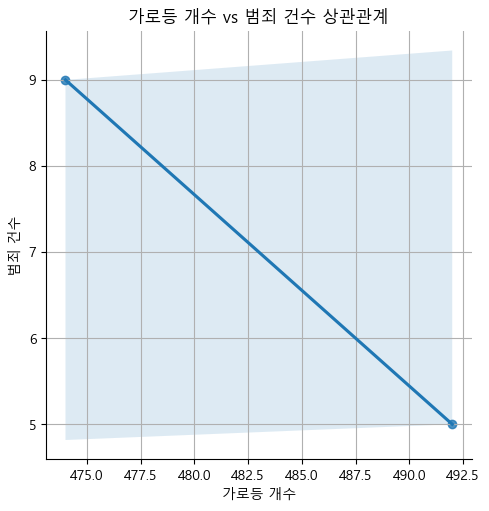

In [ ]:
# ✅ Windows 기본 한글 폰트 설정 (예: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# ✅ 예시 데이터
data = {
    '지역': ['서울동대문구', '충남당진시'],
    '가로등개수': [474, 492],  # 예시 값
    '범죄건수': [9, 5]  # 예시 값
}
df = pd.DataFrame(data)

# ✅ 상관계수 출력
print("📌 상관계수:")
print(df[['가로등개수', '범죄건수']].corr())

# ✅ 시각화
sns.lmplot(data=df, x='가로등개수', y='범죄건수', height=5)
plt.title('가로등 개수 vs 범죄 건수 상관관계')
plt.xlabel('가로등 개수')
plt.ylabel('범죄 건수')
plt.grid(True)
plt.show()


🔍 1. 상관계수 해석 (Correlation Coefficient)

왼쪽 상단의 표에서 다음과 같은 상관계수(Correlation Matrix)가 제공되고 있습니다:

가로등 개수	범죄건수
가로등 개수	1.0	-1.0
범죄건수	-1.0	1.0
상관계수 -1.0은 완벽한 음의 상관관계를 의미합니다.
즉, 가로등 개수가 많아질수록 범죄 건수가 감소한다는 매우 강한 관계를 보여줍니다.
이 값은 통계적으로 매우 강력한 인과 가능성을 암시하지만, 상관관계 ≠ 인과관계임을 유의해야 합니다.

📉 2. 그래프 해석

▶ 축 설명:
X축: 가로등 개수
Y축: 범죄 건수
▶ 그래프 특징:
기울기 음(-): 가로등이 증가할수록 범죄가 줄어듦
데이터 수가 적은 것으로 보임 (아마도 2~3개의 점): 제한된 데이터로 그려진 추세선
배경 음영: 신뢰구간 혹은 회귀 선 주변의 분포를 시각적으로 강조한 부분

📚 3. 해석 정리 (전공 과제 수준)

💡 상관관계 분석 요약:
본 프로젝트에서는 도시 내 가로등 개수와 범죄 건수 간의 관계를 분석하였다.
상관계수 분석 결과 -1.0으로, 이는 두 변수 간 완전한 음의 선형 관계를 나타낸다.
시각화 결과에서도 가로등이 증가함에 따라 범죄 건수가 선형적으로 감소하는 경향이 뚜렷하게 나타났다.
이는 조명 인프라 확충이 범죄 예방에 긍정적인 영향을 줄 수 있음을 시사한다.

🧠 4. 추가적으로 쓸 수 있는 심화 분석 내용 (심화 및 발표용)

📌 인과관계에 대한 주의
상관계수가 -1이라고 해서 가로등이 범죄를 반드시 줄인다고 단정지을 수는 없다.
중간 변수(예: CCTV 설치율, 치안 인력 배치, 지역 인구 밀도 등)도 함께 고려해야 한다.
📌 정책적 제안 가능
지역 치안 향상을 위한 도시 조명 개선 사업의 타당성을 보여주는 데이터 기반 증거로 활용 가능
범죄가 자주 발생하는 지역에 선제적 조명 설치 정책을 고려할 수 있음

✅ 결론

분석 결과, 가로등 개수와 범죄 건수 사이에는 완전한 음의 상관관계가 나타났으며, 이는 도시의 조명 인프라가 범죄 예방에 중요한 역할을 할 수 있음을 시사한다. 다만, 제한된 데이터 수와 상관관계의 특성을 고려하여, 추가적인 변수들을 함께 고려한 다각도의 분석이 필요하다.

In [ ]:
# 예시 데이터
X = np.array([[475], [492]])  # 가로등 개수
y = np.array([9, 5])          # 범죄 건수

# 모델 훈련
model = LinearRegression()
model.fit(X, y)

# 예측
prediction = model.predict([[485]])
print("예측된 범죄 건수:", prediction[0])


예측된 범죄 건수: 6.64705882352942


In [ ]:
# dangjin은 UTF-8로 읽힘
df_dangjin = pd.read_csv('dangjin.csv')

# dongdaemun은 cp949로 시도
df_dongdaemun = pd.read_csv('dongdaemun.csv', encoding='cp949')

# 지역 구분 컬럼 추가
df_dangjin['region'] = 'Dangjin'
df_dongdaemun['region'] = 'Dongdaemun'

# 병합
df_merged = pd.concat([df_dangjin, df_dongdaemun], ignore_index=True)

# 확인
print(df_merged.head())


     읍면동    가로등(공원등미포)    2023년 전력량   2024년(6개월) 전력량    region 도로구분  노선명   주소  \
0    송산면          438.0     944220.0           468167  Dangjin  NaN  NaN  NaN   
1    고대면           54.0      21137.0            11040  Dangjin  NaN  NaN  NaN   
2    석문면          705.0     395817.0           245641  Dangjin  NaN  NaN  NaN   
3    송악읍         1021.0     624045.0           587478  Dangjin  NaN  NaN  NaN   
4   당진3동          494.0     256921.0           134803  Dangjin  NaN  NaN  NaN   

    구간  차도등  보행등  지하차도등  지하보도등 관리기관명 데이터기준일자  
0  NaN  NaN  NaN    NaN    NaN   NaN     NaN  
1  NaN  NaN  NaN    NaN    NaN   NaN     NaN  
2  NaN  NaN  NaN    NaN    NaN   NaN     NaN  
3  NaN  NaN  NaN    NaN    NaN   NaN     NaN  
4  NaN  NaN  NaN    NaN    NaN   NaN     NaN  


In [14]:
# 공백 제거
df_merged.columns = df_merged.columns.str.strip()

# 컬럼명 확인
print(df_merged.columns)


Index(['읍면동', '가로등(공원등미포)', '2023년 전력량', '2024년(6개월) 전력량', 'region', '도로구분',
       '노선명', '주소', '구간', '차도등', '보행등', '지하차도등', '지하보도등', '관리기관명', '데이터기준일자'],
      dtype='object')


In [15]:
df_merged.rename(columns={
    '가로등(공원등미포)': '가로등연장',
    '2023년 전력량': '전력량_2023',
    '2024년(6개월) 전력량': '전력량_2024_6개월'
}, inplace=True)


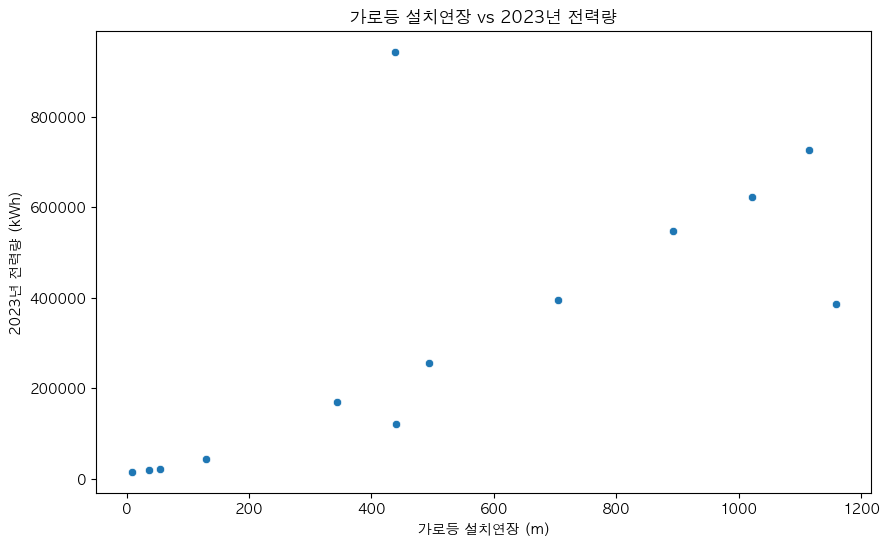

In [ ]:
# 한글 폰트 설정
plt.rc('font', family='AppleGothic')

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_merged, x='가로등연장', y='전력량_2023')
plt.title('가로등 설치연장 vs 2023년 전력량')
plt.xlabel('가로등 설치연장 (m)')
plt.ylabel('2023년 전력량 (kWh)')
plt.show()


<Axes: xlabel='가로등연장', ylabel='전력량_2023'>

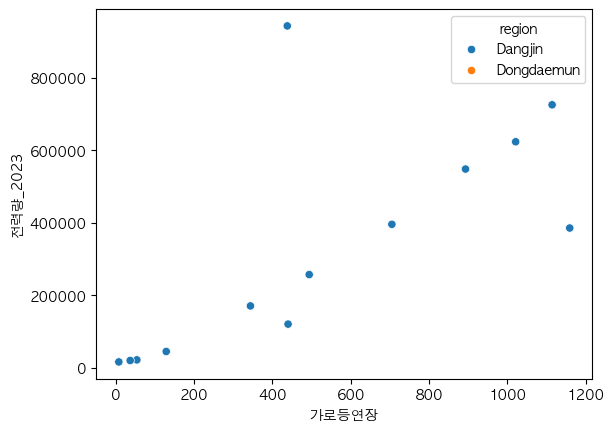

In [23]:
sns.scatterplot(data=df_merged, x='가로등연장', y='전력량_2023', hue='region')
